# Datasets, Loading Datastes and Dataframes

In [1]:
from huggingface_hub import list_datasets
import pandas
import matplotlib.pyplot as plt


In [2]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
dataset_list = list(list_datasets())
dataset_list[:5]

In [4]:
from datasets import load_dataset

emotions = load_dataset('emotion')
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

## Huggingface with datasets

In [5]:
train_dataset = emotions['train'] # this is an dataset class

print(type(train_dataset))
print(len(train_dataset))
print(train_dataset.column_names)
print(train_dataset[0])

# list all features in dataset
print(train_dataset.features)

<class 'datasets.arrow_dataset.Dataset'>
16000
['text', 'label']
{'text': 'i didnt feel humiliated', 'label': 0}
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


## Convert to pandas and dataframes

In [6]:
emotions.set_format('pandas')
print(emotions)

# get dataset meta 
df = emotions['train']
print(df[0])

df = df[:]
df.head()

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})
                      text  label
0  i didnt feel humiliated      0


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


# How to convert data labels in to readable strings

In [7]:
features = emotions['train'].features['label']

df['label_name'] = df['label'].apply(lambda x: features.int2str(x))

df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


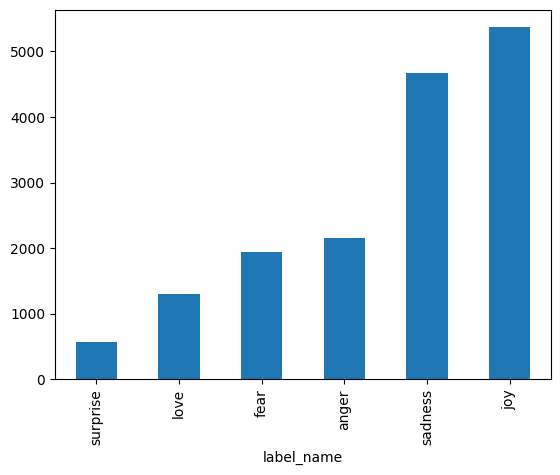

In [11]:
data = df['label_name'].value_counts(ascending=True).plot.bar()
plt.show()

## Length of the tweet message

In [12]:
df['length'] = df['text'].apply(lambda x: len(str(x).split()))
df

,text,label,label_name,length
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


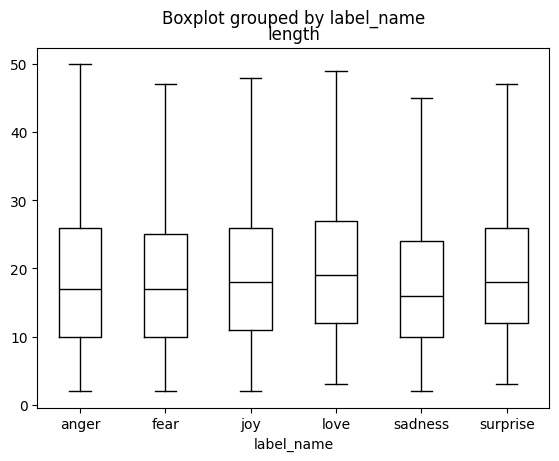

In [14]:
df.boxplot("length", by="label_name", grid=False, showfliers=False, color='black')
plt.show()